## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 35 columns):
DAMAGE_PROPERTY       8308 non-null float64
DURATION_SECONDS      8308 non-null float64
BEGIN_LAT             8308 non-null float64
BEGIN_LON             8308 non-null float64
TOR_LENGTH            8308 non-null float64
TOR_WIDTH             8308 non-null float64
YEAR                  8308 non-null float64
MULTI_VORT_IND        8308 non-null int64
OPEN_WATER_PROP       8308 non-null float64
DEV_OPEN_PROP         8308 non-null float64
DEV_LOW_PROP          8308 non-null float64
DEV_MED_PROP          8308 non-null float64
DEV_HIGH_PROP         8308 non-null float64
BARREN_LAND_PROP      8308 non-null float64
DECID_FOREST_PROP     8308 non-null float64
EVERGR_FOREST_PROP    8308 non-null float64
MIXED_FOREST_PROP     8308 non-null float64
SHRUB_SCRUB_PROP      8308 non-null float64
GRASS_LAND_PROP       8308 non-null float64
PASTURE_HAY_PROP      8308 non-null float64
CULT_CROPS_PROP

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 1 columns):
DAMAGE_PROPERTY    8308 non-null float64
dtypes: float64(1)
memory usage: 65.0 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 1:]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 34 columns):
DURATION_SECONDS      8308 non-null float64
BEGIN_LAT             8308 non-null float64
BEGIN_LON             8308 non-null float64
TOR_LENGTH            8308 non-null float64
TOR_WIDTH             8308 non-null float64
YEAR                  8308 non-null float64
MULTI_VORT_IND        8308 non-null int64
OPEN_WATER_PROP       8308 non-null float64
DEV_OPEN_PROP         8308 non-null float64
DEV_LOW_PROP          8308 non-null float64
DEV_MED_PROP          8308 non-null float64
DEV_HIGH_PROP         8308 non-null float64
BARREN_LAND_PROP      8308 non-null float64
DECID_FOREST_PROP     8308 non-null float64
EVERGR_FOREST_PROP    8308 non-null float64
MIXED_FOREST_PROP     8308 non-null float64
SHRUB_SCRUB_PROP      8308 non-null float64
GRASS_LAND_PROP       8308 non-null float64
PASTURE_HAY_PROP      8308 non-null float64
CULT_CROPS_PROP       8308 non-null float64
WOOD_WETLAND_PR

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.1532
 0.6540
 0.0873
   ⋮    
 0.5790
 0.1532
 0.2814
[torch.DoubleTensor of size 8308x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 0.0227 -1.6434 -0.4323  ...  -0.2947 -0.8098 -0.4531
-0.3046  0.2063  0.5545  ...  -0.2947  0.5157  1.1092
 0.3520 -0.3313 -0.8991  ...  -1.0297 -1.1142 -0.1038
          ...             ⋱             ...          
 0.5451 -0.2386  0.6373  ...  -1.0297  0.1597 -1.5301
 0.0227 -1.2487  0.6113  ...   0.8078  0.2605 -2.1918
 0.4583 -0.4701 -0.0348  ...  -1.7647 -0.3808  0.5064
[torch.DoubleTensor of size 8308x34]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 0.0227 -1.6434 -0.4323  ...  -0.2947 -0.8098 -0.4531
-0.3046  0.2063  0.5545  ...  -0.2947  0.5157  1.1092
 0.3520 -0.3313 -0.8991  ...  -1.0297 -1.1142 -0.1038
          ...             ⋱             ...          
 0.5451 -0.2386  0.6373  ...  -1.0297  0.1597 -1.5301
 0.0227 -1.2487  0.6113  ...   0.8078  0.2605 -2.1918
 0.4583 -0.4701 -0.0348  ...  -1.7647 -0.3808  0.5064
[torch.FloatTensor of size 8308x34]

## Two Hidden Layers with 100 Neurons each, Dropout = 5%

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 100),     # Hidden Layer (HL) 1
                            torch.nn.Dropout(p = 0.05),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 100),    # HL 2
                            torch.nn.Dropout(p = 0.05),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 1))      # Outcome

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Switch the model to training mode
    model.train();
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 15000))

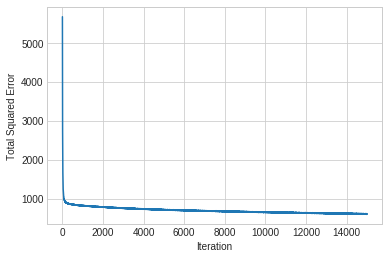

In [13]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8308)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()


# This is for the validation performance plot later
outcomes_array_for_perf = outcomes_Variable_resized.data.numpy()*5.407597 + 7.688844

outcomes_list_for_perf = outcomes_array_for_perf.tolist()

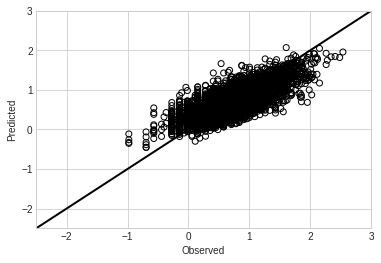

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [19]:
# Put the model in evaluation mode
model.eval()


# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
1.00000e-02 *
  9.5394
[torch.FloatTensor of size 1]

In [20]:
# Computing the total sum of squares
# Get a torch Variable of the mean outcome
# Compute mean value
valid_outcomes_mean = (sum(valid_outcomes_Variable) / len(valid_outcomes_Variable))
valid_outcomes_mean = valid_outcomes_mean.data.numpy()[0]

# Make that into a ndarray
valid_outcomes_mean = np.repeat(valid_outcomes_mean, len(valid_outcomes_Variable))

# Turn the array into a torch Tensor
valid_outcomes_mean = torch.from_numpy(valid_outcomes_mean)

# Turn that Tensor into a Variable
valid_outcomes_mean_Variable = Variable(valid_outcomes_mean)

# Compute the TSS
tot_sum_squares = loss_fn(valid_outcomes_mean_Variable, valid_outcomes_Variable)


# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.4365
[torch.FloatTensor of size 1]

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2808)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Convert back to log scale
valid_outcomes_array = valid_outcomes_array*5.407597 + 7.68884


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

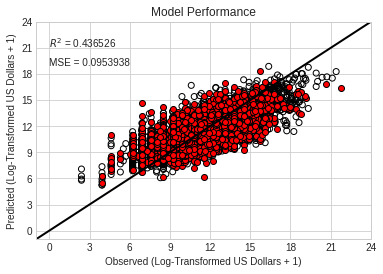

In [23]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

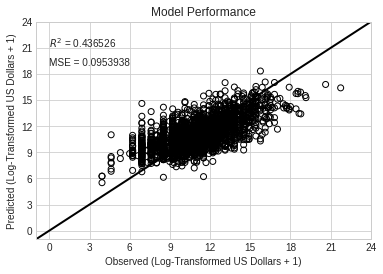

In [24]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [25]:
model[(0)].weight

Parameter containing:
-0.0544 -0.1542 -0.1107  ...  -0.1764 -0.0847  0.1222
 0.0434 -0.0945 -0.0131  ...  -0.1349 -0.1927  0.0303
-0.1908  0.0064 -0.0218  ...   0.0913 -0.0026  0.0771
          ...             ⋱             ...          
 0.0541  0.2153  0.0127  ...  -0.0826 -0.0229  0.0810
-0.0190  0.1775 -0.0297  ...  -0.1842 -0.0150 -0.1122
 0.0269  0.0329  0.2331  ...  -0.0794  0.2721 -0.0614
[torch.FloatTensor of size 100x34]

## Same Model, Dropout = 2.5%

In [26]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [27]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 100),     # Hidden Layer (HL) 1
                            torch.nn.Dropout(p = 0.025),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 100),    # HL 2
                            torch.nn.Dropout(p = 0.025),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 1))      # Outcome

In [28]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Switch the model to training mode
    model.train();
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

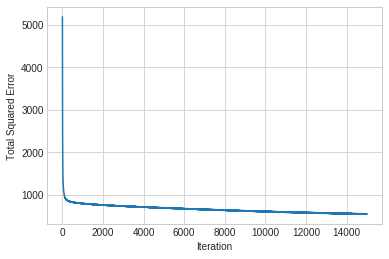

In [29]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [30]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

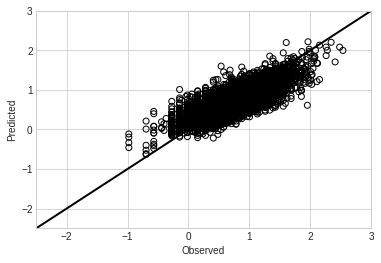

In [31]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Validation Set Performance

In [32]:
# Put the model in evaluation mode
model.eval()


# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
1.00000e-02 *
  9.6260
[torch.FloatTensor of size 1]

In [33]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.4314
[torch.FloatTensor of size 1]

In [34]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

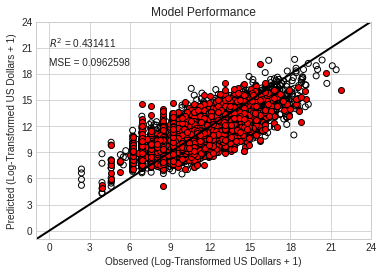

In [35]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

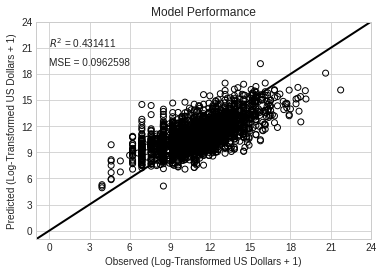

In [36]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [37]:
model[(0)].weight

Parameter containing:
 0.2169 -0.1444 -0.1355  ...   0.0514 -0.0716 -0.0243
-0.0125 -0.0826 -0.1008  ...  -0.1426  0.2038  0.0337
 0.0284 -0.0737  0.0982  ...   0.1144  0.1848 -0.1203
          ...             ⋱             ...          
-0.1192  0.1783 -0.0033  ...  -0.0265 -0.0124 -0.0430
-0.0863 -0.1858  0.1315  ...   0.0064  0.0749 -0.0948
-0.1216 -0.0318 -0.2106  ...   0.0875 -0.1423  0.1033
[torch.FloatTensor of size 100x34]

## Same Model, Dropout = 1%

In [38]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [39]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 100),     # Hidden Layer (HL) 1
                            torch.nn.Dropout(p = 0.01),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 100),    # HL 2
                            torch.nn.Dropout(p = 0.01),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 1))      # Outcome

In [40]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Switch the model to training mode
    model.train();
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

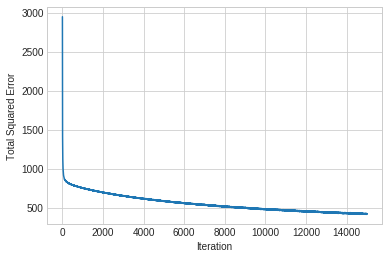

In [41]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [42]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

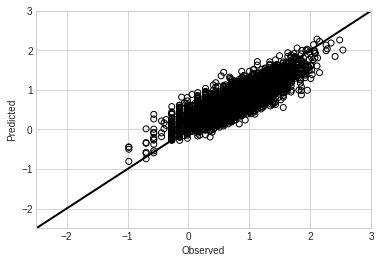

In [43]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Validation Set Performance

In [44]:
# Put the model in evaluation mode
model.eval()


# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1038
[torch.FloatTensor of size 1]

In [45]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3869
[torch.FloatTensor of size 1]

In [46]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

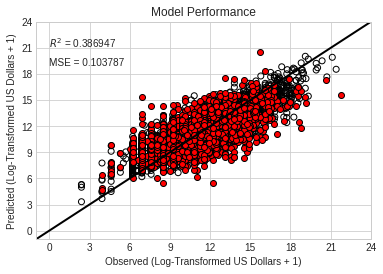

In [47]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

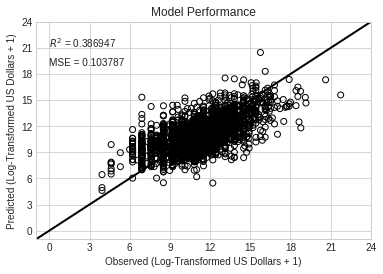

In [48]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [49]:
model[(0)].weight

Parameter containing:
 1.5483e-01  2.8535e-01 -1.7664e-01  ...   1.1121e-01 -1.2258e-01 -2.3388e-01
 2.8900e-03  1.1741e-01  4.4254e-02  ...   1.6654e-01  2.9195e-01 -8.6027e-03
 1.3971e-02 -2.2491e-01  5.7461e-02  ...   1.7611e-01 -1.2092e-01  2.0450e-01
                ...                   ⋱                   ...                
-1.9602e-01 -1.1280e-01 -1.0210e-02  ...  -1.0258e-01 -2.8802e-02  1.1632e-01
 1.3813e-01 -2.4776e-01 -2.2274e-02  ...  -3.1963e-02  1.8574e-01  8.3499e-02
-2.3748e-02 -4.0768e-02  1.7031e-01  ...  -2.1207e-03 -2.1001e-01 -4.1983e-02
[torch.FloatTensor of size 100x34]

## Same Model, Dropout = 50%

In [50]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [51]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 100),     # Hidden Layer (HL) 1
                            torch.nn.Dropout(p = 0.5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 100),    # HL 2
                            torch.nn.Dropout(p = 0.5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 1))      # Outcome

In [52]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Switch the model to training mode
    model.train();
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

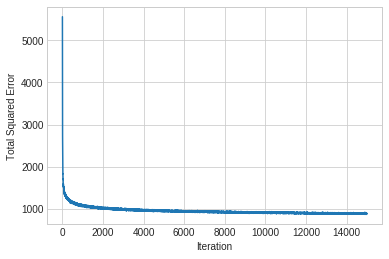

In [53]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [54]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

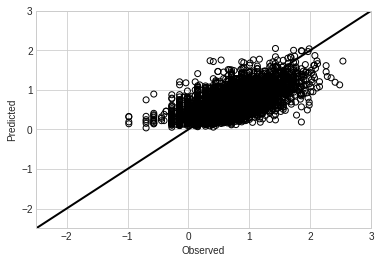

In [55]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Validation Set Performance

In [56]:
# Put the model in evaluation mode
model.eval()


# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
1.00000e-02 *
  9.8537
[torch.FloatTensor of size 1]

In [57]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.4180
[torch.FloatTensor of size 1]

In [58]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

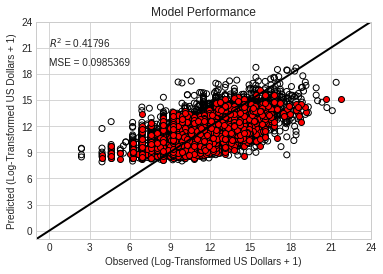

In [59]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

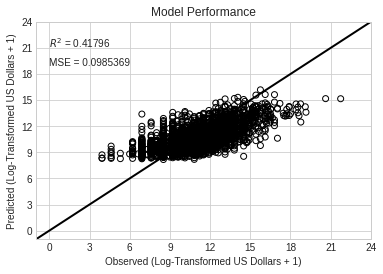

In [60]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [61]:
model[(0)].weight

Parameter containing:
 0.0310  0.0364  0.0322  ...   0.0916  0.0448 -0.0007
 0.1058  0.0785 -0.0456  ...  -0.1870  0.0014 -0.0925
-0.0334  0.1543  0.1369  ...  -0.1126  0.0066  0.1024
          ...             ⋱             ...          
 0.1248 -0.1715  0.0272  ...   0.1027 -0.0023 -0.0568
-0.0447  0.1283 -0.1023  ...   0.0623  0.0256  0.0225
 0.0448 -0.0295 -0.0505  ...   0.0581 -0.0203  0.0382
[torch.FloatTensor of size 100x34]

## Same Model, Dropout = 20%

In [62]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [63]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 100),     # Hidden Layer (HL) 1
                            torch.nn.Dropout(p = 0.2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 100),    # HL 2
                            torch.nn.Dropout(p = 0.2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 1))      # Outcome

In [64]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Switch the model to training mode
    model.train();
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

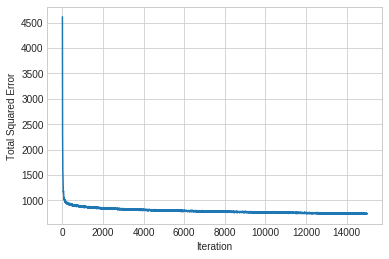

In [65]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [66]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

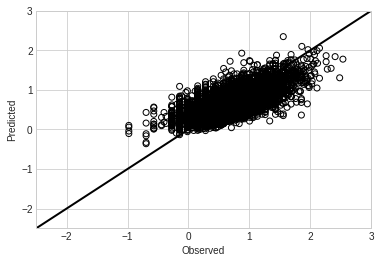

In [67]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Validation Set Performance

In [68]:
# Put the model in evaluation mode
model.eval()


# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
1.00000e-02 *
  9.3423
[torch.FloatTensor of size 1]

In [69]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.4482
[torch.FloatTensor of size 1]

In [70]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

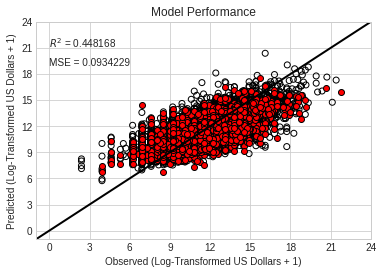

In [71]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

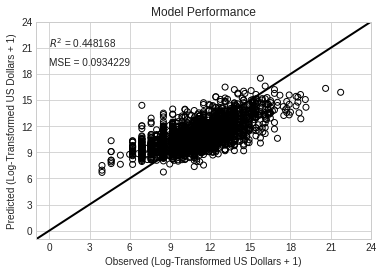

In [72]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [73]:
model[(0)].weight

Parameter containing:
 0.1376  0.1428 -0.0115  ...   0.1021 -0.0921 -0.0824
 0.0861 -0.1563 -0.0577  ...   0.0634 -0.0817 -0.0798
 0.1233  0.2436  0.1309  ...  -0.0958  0.0466 -0.2389
          ...             ⋱             ...          
-0.0065  0.1104 -0.1354  ...   0.0280 -0.0710 -0.1450
 0.1943 -0.1147 -0.0027  ...   0.1484 -0.1136 -0.0434
-0.1074 -0.0126  0.0955  ...  -0.0187  0.2454 -0.0796
[torch.FloatTensor of size 100x34]

## Same Model, Dropout = 10%

In [74]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [75]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 100),     # Hidden Layer (HL) 1
                            torch.nn.Dropout(p = 0.1),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 100),    # HL 2
                            torch.nn.Dropout(p = 0.1),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 1))      # Outcome

In [76]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Switch the model to training mode
    model.train();
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

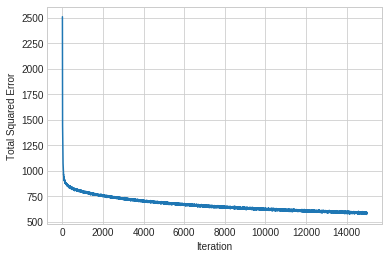

In [77]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [78]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

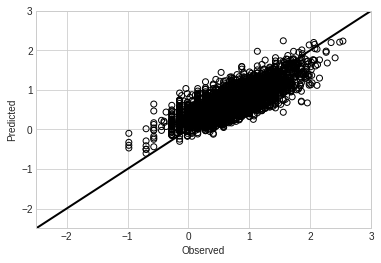

In [79]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Validation Set Performance

In [80]:
# Put the model in evaluation mode
model.eval()


# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
1.00000e-02 *
  9.4194
[torch.FloatTensor of size 1]

In [81]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.4436
[torch.FloatTensor of size 1]

In [82]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

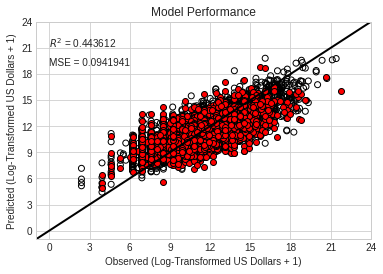

In [83]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

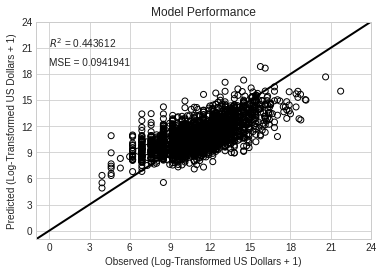

In [84]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [85]:
model[(0)].weight

Parameter containing:
-0.1170  0.2364 -0.2068  ...  -0.0709 -0.0201  0.0978
-0.0357 -0.1126 -0.0963  ...   0.0718 -0.1725 -0.0790
 0.1505  0.0451  0.0390  ...  -0.1000  0.0013  0.0836
          ...             ⋱             ...          
 0.0854  0.0261  0.0680  ...   0.0968 -0.0589 -0.0289
-0.1097 -0.1546 -0.0151  ...  -0.0268  0.1452 -0.0653
-0.1689  0.0342  0.0502  ...  -0.1081  0.0914 -0.1821
[torch.FloatTensor of size 100x34]

## Same Model, Dropout = 30%

In [86]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [87]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 100),     # Hidden Layer (HL) 1
                            torch.nn.Dropout(p = 0.3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 100),    # HL 2
                            torch.nn.Dropout(p = 0.3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(100, 1))      # Outcome

In [88]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-3


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Switch the model to training mode
    model.train();
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

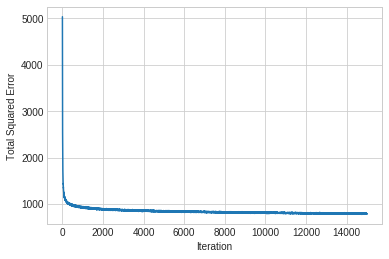

In [89]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [90]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

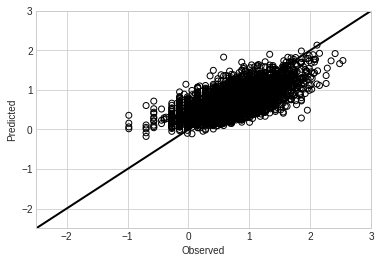

In [91]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Validation Set Performance

In [92]:
# Put the model in evaluation mode
model.eval()


# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
1.00000e-02 *
  9.3533
[torch.FloatTensor of size 1]

In [93]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.4475
[torch.FloatTensor of size 1]

In [94]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

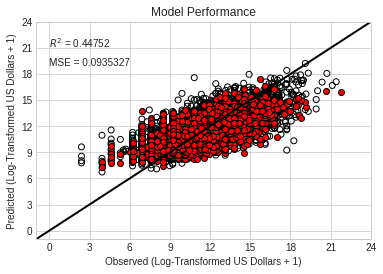

In [95]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

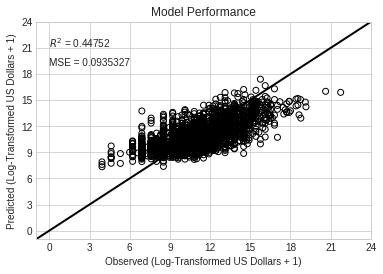

In [96]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [97]:
model[(0)].weight

Parameter containing:
-7.9029e-02  4.7135e-02  1.3627e-01  ...  -2.1240e-01 -3.0379e-02  4.8266e-02
 2.5948e-02  1.7115e-02  8.4353e-03  ...  -1.1962e-02 -1.0738e-01 -4.2455e-02
 5.3276e-02 -2.0089e-01 -1.7821e-01  ...   8.2333e-02 -2.0379e-01  8.3270e-03
                ...                   ⋱                   ...                
-6.9840e-02 -1.2441e-01 -1.2091e-02  ...   1.5857e-01 -3.6197e-02 -5.5321e-03
 1.0945e-01 -1.3129e-01 -9.9470e-03  ...  -4.4929e-02 -4.6236e-02 -7.8945e-02
-3.3439e-02  1.2882e-01 -7.9050e-03  ...   1.2747e-01 -1.0349e-02  1.0579e-01
[torch.FloatTensor of size 100x34]